# Keras Hello world
参考: https://www.bilibili.com/video/av40787141

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


## 线性回归

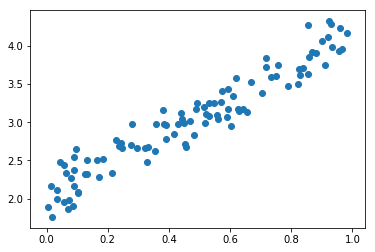

In [38]:
# 构造线性数据 y = 2*x + 2
x_data = np.random.random(100)
# 添加噪音，数据总量100，平均值0.1，标准差0.2
noise = np.random.normal(0.1, 0.2, size=(100))
y_data = 2 * x_data + 2 + noise

# 散点图显示x,y之间的关系
plt.scatter(x_data, y_data)

In [43]:
# 构造序列网络模型
model = Sequential()
# 增加全连接网络层，配置输出神经元units数量，输入的维度input_dim
# 因为预测的是一个标量，所以配置一个神经元即可，输入的数据只有一个特征，所以输入的维度是1
# 配置输入的数据有两种方式input_dim, input_shape
# model.add(Dense(units=1, input_dim=1))
model.add(Dense(units=1, input_shape=(1,)))
# 编译模型，优化器选择SGD，损失函数选择MSE，均方差
model.compile(optimizer="SGD", loss="MSE")


# 由于只有一个全连接层及单元，所以只有一个 (W, b)连接权重，即y = W*x + b

# 训练模型有多重方式，
# 1. fit: 传入特征及目标值，以及训练的轮数，所有数据都训练了一次叫做一轮，1 epochs，
# 还可以传入批次的数量batch_size
model.fit(x=x_data, y=y_data, epochs=20)

Epoch 1/20
100/100 [==============================] - 0s 2ms/step - loss: 8.4477
Epoch 2/20
100/100 [==============================] - 0s 169us/step - loss: 5.1702
Epoch 3/20
100/100 [==============================] - 0s 153us/step - loss: 3.1813
Epoch 4/20
100/100 [==============================] - 0s 203us/step - loss: 1.9773
Epoch 5/20
100/100 [==============================] - 0s 183us/step - loss: 1.2455
Epoch 6/20
100/100 [==============================] - 0s 164us/step - loss: 0.8012
Epoch 7/20
100/100 [==============================] - 0s 179us/step - loss: 0.5293
Epoch 8/20
100/100 [==============================] - 0s 169us/step - loss: 0.3639
Epoch 9/20
100/100 [==============================] - 0s 119us/step - loss: 0.2628
Epoch 10/20
100/100 [==============================] - 0s 208us/step - loss: 0.2010
Epoch 11/20
100/100 [==============================] - 0s 193us/step - loss: 0.1631
Epoch 12/20
100/100 [==============================] - 0s 243us/step - loss: 0.1388
Epo

In [44]:
# 2. train_on_bacth
for i in range(3000):
#     这是训练了3000 轮？
    error = model.train_on_batch(x_data, y_data)
    if i % 300 == 0:
        print(error)

0.090878
0.058578752
0.044805985
0.038834304
0.036245
0.0351223
0.0346355
0.034424435
0.034332916
0.034293234


[[1.4714545]] [0.98754466]


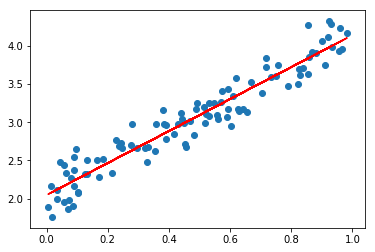

In [41]:
# print W, b
w, b = model.layers[0].get_weights()
print(w, b)

y_predict = model.predict(x_data)
plt.scatter(x_data, y_data)
plt.plot(x_data, y_predict, c="red")

## 非线性回归

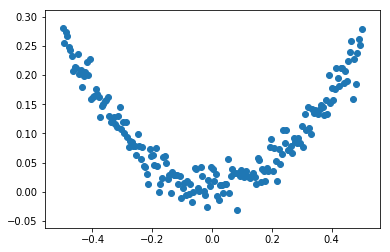

In [21]:
# 构造非线性模型数据
# 生成范围-0.5 到 0.5的等距离的200个点， 步长 (0.5 + 0.5) / 200
x1_data = np.linspace(-0.5, 0.5, 200)
# 添加噪音
noise1 = np.random.normal(0.01, 0.02, size=(200))
# y = x * x
y1_data = np.square(x1_data) + noise1

plt.scatter(x1_data, y1_data)

In [35]:
# 构造模型
model1 = Sequential()
# 增加第一个全连接层，输出单元为2
# 好像当前模型其他条件不变的情况下，sigmoid的效果比起tanh要差很多，几乎难以弯曲，或者说拟合
# 可以通过在Dense里面添加activation关键字的方式或者使用Activation对象
# model1.add(Dense(units=10, input_dim=1, activation="sigmoid"))
# 而神经元的数量可以使得弯曲程度加快
model1.add(Dense(units=2, input_dim=1, activation="tanh"))
# model1.add(Activation("tanh"))
# 增加第二个全连接层，输出单元为1，即最终结果，除了模型的第一层需要配置输入数据的维度，后面面的网络层只需要配置输出单元
model1.add(Dense(units=1, activation="tanh"))
# model1.add(Activation("tanh"))


# 默认SGD优化器学习率比较低
sgd1 = SGD(lr=0.3)
model1.compile(sgd1, loss="mse")

# 而最终的模型收敛速度由很多方面决定，比如优化器的学习效率，activation的选择，神经元的数量

In [36]:
for i in range(3000):
    loss = model1.train_on_batch(x1_data, y1_data)
    if i % 200 == 0:
        print(loss)

# model1.fit(x1_data, y1_data, epochs=10)

0.19266228
0.0061520534
0.006073513
0.0059832013
0.005863332
0.005686218
0.005404383
0.004937415
0.0041722
0.0030462695
0.0017807073
0.0008748613
0.0004931028
0.00038945326
0.000367921


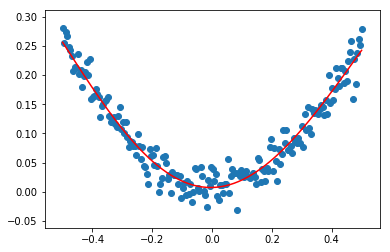

In [37]:
y1_predict = model1.predict(x1_data)
plt.scatter(x1_data, y1_data)
plt.plot(x1_data, y1_predict, c="red")

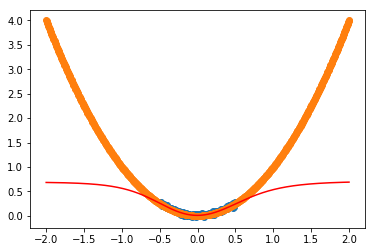

In [42]:
# 顺便瞧瞧更大维度的数据预测情况
x_large_data = np.linspace(-2, 2, 800)
y_large_predict = model1.predict(x_large_data)
plt.scatter(x1_data, y1_data)
plt.scatter(x_large_data, x_large_data * x_large_data)
plt.plot(x_large_data, y1_predict, c="red")

# 其实会有点问题
# 问题如下

## MNIST 数据集分类

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils

(60000, 28, 28)
(60000,)
5


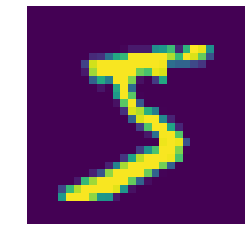

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 查看数据shape
print(x_train.shape)
print(y_train.shape)

# 查看数据内容
plt.imshow(x_train[0,:,:])
# 不显示数据轴
plt.axis("off")
print(y_train[0])

In [4]:
# 数据预处理，原始数据是28x28的二维数据，需要转换成1维数据给全连接层
# 一定要数据归一化,不然训练时间大大加长, 且准确率一直上不去
# 如果用增加学习效率的方式提升收敛速度(数据没归一化的话),很有可能会准确率不增反降！！！
x_train_  = x_train.reshape((x_train.shape[0], -1)) / 255.0
x_test_  = x_test.reshape((x_test.shape[0], -1)) / 255.0

# 构建网络模型
model2 = Sequential()
# softmax将数值转为概率
model2.add(Dense(units=10, activation="softmax", input_shape=(x_train_.shape[1], ), bias_initializer="one"))

# 不同的优化器对不同的问题有不同的效率，需要按需选择
sgd = SGD(lr=0.2)
# adm = Adam(lr=0.01)
model2.compile(sgd, loss="mse", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# 因为输出的shape是(10, ), 而原始数据的shape是(1)， 所以需要将数据做一定的变形
y_train_ = np_utils.to_categorical(y_train, num_classes=10)
y_test_ = np_utils.to_categorical(y_test, num_classes=10)

# 再次查看目标值数据结构
print(y_train_.shape)
print(y_train[0])
print(y_train_[0,:])

(60000, 10)
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [193]:
# 训练模型
model2.fit(x_train_, y_train_, epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0367 - acc: 0.7883
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0203 - acc: 0.8807
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0178 - acc: 0.8928
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0165 - acc: 0.8986
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0157 - acc: 0.9031
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0151 - acc: 0.9061
Epoch 7/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0147 - acc: 0.9090
Epoch 8/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0143 - acc: 0.9109
Epoch 9/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0140 - acc: 0.9122
Epoch 10/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0138 - acc: 0.9135

In [191]:
# 评估模型
model2.evaluate(x_test_, y_test_)

10000/10000 [==============================] - 1s 59us/step


[0.013855882668856997, 0.9212]

### 使用交叉熵提高准确率

In [6]:
# 数据预处理
x_train_  = x_train.reshape((x_train.shape[0], -1)) / 255.0
x_test_  = x_test.reshape((x_test.shape[0], -1)) / 255.0

y_train_ = np_utils.to_categorical(y_train, num_classes=10)
y_test_ = np_utils.to_categorical(y_test, num_classes=10)

# 构建网络模型
model2 = Sequential()
model2.add(Dense(units=10, activation="softmax", input_shape=(x_train_.shape[1], ), bias_initializer="one"))


sgd = SGD(lr=0.2)
# 只需改变损失函数为categorical_crossentropy
model2.compile(sgd, loss="categorical_crossentropy", metrics=["accuracy"])
# 训练模型
model2.fit(x_train_, y_train_, epochs=4, batch_size=32)

# 评估模型
model2.evaluate(x_test_, y_test_)

# 就输出信息而言，准确率第一轮就上升到了0.89，比之前的mse的第一轮数据0.78要很多呀！
# 说明可以通过交叉熵的方式减少训练时间，同样的数据，mse需要训练十轮才达到饱和，交叉熵4轮差不多就可以了
# 但是最终的结果相差无几

Instructions for updating:
Use tf.cast instead.
Epoch 1/4
60000/60000 [==============================] - 2s 40us/step - loss: 0.3767 - acc: 0.8933
Epoch 2/4
60000/60000 [==============================] - 2s 38us/step - loss: 0.3027 - acc: 0.9156
Epoch 3/4
60000/60000 [==============================] - 2s 37us/step - loss: 0.2894 - acc: 0.9184
Epoch 4/4
10000/10000 [==============================] - 0s 21us/step


[0.285372691604495, 0.9197]

### 是否可以通过其他方式提升训练速度？

尝试首先将学习率提高很多，比如原始训练速度的两倍，保存模型然后再次以小学习率再次训练

In [17]:
import keras.backend as K
model3 = Sequential()
# softmax将数值转为概率
model3.add(Dense(units=10, activation="softmax", input_shape=(x_train_.shape[1], ), bias_initializer="one"))

# 不同的优化器对不同的问题有不同的效率，需要按需选择
sgd = SGD(lr=0.5)
# adm = Adam(lr=0.01)
model3.compile(sgd, loss="mse", metrics=["accuracy"])

y_train_ = np_utils.to_categorical(y_train, num_classes=10)
y_test_ = np_utils.to_categorical(y_test, num_classes=10)

print(K.get_value(model3.optimizer.lr))
model3.fit(x_train_, y_train_, epochs=2, batch_size=32)


K.set_value(model3.optimizer.lr, 0.08)
print(K.get_value(model3.optimizer.lr))
model3.fit(x_train_, y_train_, epochs=3, batch_size=32)
model3.evaluate(x_test_, y_test_)

0.5
Epoch 1/2
60000/60000 [==============================] - 2s 35us/step - loss: 0.0270 - acc: 0.8399
Epoch 2/2
60000/60000 [==============================] - 2s 33us/step - loss: 0.0165 - acc: 0.8989
0.08
Epoch 1/3
60000/60000 [==============================] - 2s 31us/step - loss: 0.0152 - acc: 0.9053
Epoch 2/3
60000/60000 [==============================] - 2s 31us/step - loss: 0.0150 - acc: 0.9068
Epoch 3/3
10000/10000 [==============================] - 0s 24us/step


[0.014030214979313314, 0.9124]

事实证明是可以的，所以可以通过前提将学习效率显著提高，然后后期将学习效率减少，已获得更快的训练速度

### 通过Dropout放置过拟合

In [46]:
# 增加网络模型复杂度，提升模型精确度
model4 = Sequential()
model4.add(Dense(units=40, activation="relu", input_shape=(x_train_.shape[1], ), bias_initializer="one"))
model4.add(Dense(units=20, activation="relu", input_shape=(x_train_.shape[1], ), bias_initializer="one"))
model4.add(Dense(units=10, activation="softmax", input_shape=(x_train_.shape[1], ), bias_initializer="one"))

sgd = SGD(lr=0.1)
model4.compile(sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model4.fit(x_train_, y_train_, epochs=5, batch_size=32)
print("evaluate train datasets")
print(model4.evaluate(x_train_, y_train_))
print("evaluate test datasets")
print(model4.evaluate(x_test_, y_test_))

Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.3389 - acc: 0.8972
Epoch 2/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.1602 - acc: 0.9517
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.1210 - acc: 0.9639
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.1002 - acc: 0.9689
Epoch 5/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0871 - acc: 0.9730
evaluate train datasets
60000/60000 [==============================] - 1s 23us/step
[0.064496201136879, 0.9804166666666667]
evaluate test datasets
10000/10000 [==============================] - 0s 23us/step
[0.10522403119727969, 0.9696]


In [48]:
# 增加网络模型复杂度，提升模型精确度
# 但是也可能会导致过拟合
# 可以通过dropout的方式尽可能避免过拟合
from keras.layers import Dropout

model5 = Sequential()
model5.add(Dense(units=40, activation="relu", input_shape=(x_train_.shape[1], ), bias_initializer="one"))
model5.add(Dense(units=20, activation="relu", input_shape=(x_train_.shape[1], ), bias_initializer="one"))
model5.add(Dropout(0.4))
model5.add(Dense(units=10, activation="softmax", input_shape=(x_train_.shape[1], ), bias_initializer="one"))

sgd = SGD(lr=0.1)
model5.compile(sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model5.fit(x_train_, y_train_, epochs=5, batch_size=32)
print("evaluate train datasets")
print(model5.evaluate(x_train_, y_train_))
print("evaluate test datasets")
print(model5.evaluate(x_test_, y_test_))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.6200 - acc: 0.8026
Epoch 2/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.3615 - acc: 0.8887
Epoch 3/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.3027 - acc: 0.9081
Epoch 4/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2701 - acc: 0.9171
Epoch 5/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2547 - acc: 0.9230
evaluate train datasets
60000/60000 [==============================] - 2s 27us/step
[0.11438371137694145, 0.96625]
evaluate test datasets
10000/10000 [==============================] - 0s 26us/step
[0.13475519996257498, 0.9639]


通过比较测试集与训练集的精确度的差异了解数据是否过拟合

## 数据正则化

In [50]:
from keras.regularizers import l2

model5 = Sequential()
model5.add(Dense(units=40, activation="relu", input_shape=(x_train_.shape[1], ), bias_initializer="one", kernel_regularizer=l2(0.0001)))
model5.add(Dense(units=20, activation="relu", input_shape=(x_train_.shape[1], ), bias_initializer="one", kernel_regularizer=l2(0.0001)))
model5.add(Dense(units=10, activation="softmax", input_shape=(x_train_.shape[1], ), bias_initializer="one", kernel_regularizer=l2(0.0001)))

sgd = SGD(lr=0.1)
model5.compile(sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model5.fit(x_train_, y_train_, epochs=5, batch_size=32)
print("evaluate train datasets")
print(model5.evaluate(x_train_, y_train_))
print("evaluate test datasets")
print(model5.evaluate(x_test_, y_test_))

Epoch 1/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.3280 - acc: 0.9052
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.1762 - acc: 0.9535
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.1438 - acc: 0.9636
Epoch 4/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.1277 - acc: 0.9681
Epoch 5/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.1170 - acc: 0.9723
evaluate train datasets
60000/60000 [==============================] - 2s 27us/step
[0.10350066922008991, 0.9770166666666666]
evaluate test datasets
10000/10000 [==============================] - 0s 25us/step
[0.13446754181981085, 0.9655]


正则化参数似乎是需要多测试几遍的，主要是为了**简化模型**，提高**模型的泛化能力**

## 优化器
比较常用的有SGD, Adam优化器

而不同的优化器的效率及速度是不一样的， 大多数情况下Adam优于SGD，据说

##  卷积网络CNN

In [68]:
from keras.layers import Conv2D, MaxPool2D, Flatten

# 卷积网络不需要将网络转换成一维, 所以可以直接将二维数据输入
# 但是卷积网络的2维数据有一定的格式要求, 默认是(batch_size, height, width, chanels)
# 所以需要将数据reshape
cnn_x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
cnn_x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

model6 = Sequential()
# 至少传入参数filters, kernel_size
# 即 多少个filter, 每次filter的单位是多少,默认步长是(1, 1), padding是vaild
# padding=same, 代表在卷积之后,使得输出与原输入一样
# valid 代表不填充
model6.add(Conv2D(3, (3, 3), input_shape=(28, 28, 1), padding="same", activation="relu"))
# 卷积层输出 16 * 28 * 28
# 一般卷积层后面紧接着一个池化层,由于向下采样
# 默认池化单位是(2, 2), 相当于削减1/4体积
model6.add(MaxPool2D())
# model6.add(Conv2D(8, (5, 5))
# # 卷积层输出 8 * 24 * 24
# model6.add(MaxPool2D())
# 卷积网络超级费计算, 用CPU实在是煎熬
model6.add(Flatten())
model6.add(Dense(units=10, activation="softmax"))

sgd6 = SGD(0.1)
adm6 = Adam(0.005)

model6.compile(adm6, loss="categorical_crossentropy", metrics=["accuracy"])

model6.fit(cnn_x_train, y_train_, epochs=5, batch_size=32)
print("evaluate train datasets")
print(model6.evaluate(cnn_x_train, y_train_))
print("evaluate test datasets")
print(model6.evaluate(cnn_x_test, y_test_))

Epoch 1/5
60000/60000 [==============================] - 14s 226us/step - loss: 0.2385 - acc: 0.9301
Epoch 2/5
60000/60000 [==============================] - 14s 227us/step - loss: 0.1377 - acc: 0.9586
Epoch 3/5
60000/60000 [==============================] - 15s 242us/step - loss: 0.1163 - acc: 0.9650
Epoch 4/5
60000/60000 [==============================] - 15s 247us/step - loss: 0.1064 - acc: 0.9680
Epoch 5/5
60000/60000 [==============================] - 16s 261us/step - loss: 0.0997 - acc: 0.9701
evaluate train datasets
60000/60000 [==============================] - 9s 158us/step
[0.08116338098421692, 0.9757]
evaluate test datasets
10000/10000 [==============================] - 1s 148us/step
[0.09429976611174642, 0.9704]


## 保存训练好的模型

In [8]:
from keras.layers import Dropout

model5 = Sequential()
model5.add(Dense(units=40, activation="relu", input_shape=(x_train_.shape[1], ), bias_initializer="one"))
model5.add(Dense(units=20, activation="relu", input_shape=(x_train_.shape[1], ), bias_initializer="one"))
model5.add(Dropout(0.4))
model5.add(Dense(units=10, activation="softmax", input_shape=(x_train_.shape[1], ), bias_initializer="one"))

sgd = SGD(lr=0.1)
model5.compile(sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model5.fit(x_train_, y_train_, epochs=5, batch_size=32)
print("evaluate train datasets")
print(model5.evaluate(x_train_, y_train_))
print("evaluate test datasets")
print(model5.evaluate(x_test_, y_test_))

# 保存模型
# 保存模型有两种方式save, save_weights
model5.save("mnist_dense_model.hdf5")

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.6215 - acc: 0.8012
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.3683 - acc: 0.8890
Epoch 3/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.3112 - acc: 0.9064
Epoch 4/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.2811 - acc: 0.9163
Epoch 5/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2603 - acc: 0.9220
evaluate train datasets
60000/60000 [==============================] - 2s 28us/step
[0.12304026669667413, 0.9624333333333334]
evaluate test datasets
10000/10000 [==============================] - 0s 31us/step
[0.15816135155558586, 0.9558]


导入模型

导入的模型可以接着继续训练

In [70]:
from keras.models import load_model

model7 = load_model("mnist_dense_model.hdf5")
print("evaluate train datasets")
print(model7.evaluate(x_train_, y_train_))
print("evaluate test datasets")
print(model7.evaluate(x_test_, y_test_))

evaluate train datasets
60000/60000 [==============================] - 2s 36us/step
[0.11961323321020852, 0.96425]
evaluate test datasets
10000/10000 [==============================] - 0s 32us/step
[0.14259768457049504, 0.9578]


## 可视化


训练历史可视化

In [7]:
model8 = Sequential()
model8.add(Dense(units=40, activation="relu", input_shape=(x_train_.shape[1], ), bias_initializer="one"))
model8.add(Dense(units=20, activation="relu", input_shape=(x_train_.shape[1], ), bias_initializer="one"))
model8.add(Dropout(0.4))
model8.add(Dense(units=10, activation="softmax", input_shape=(x_train_.shape[1], ), bias_initializer="one"))

sgd = SGD(lr=0.1)
model8.compile(sgd, loss="categorical_crossentropy", metrics=["accuracy"])

history = model8.fit(x_train_, y_train_, validation_split=0.25, epochs=4, batch_size=32, verbose=1)
print("evaluate train datasets")
print(model8.evaluate(x_train_, y_train_))
print("evaluate test datasets")
print(model8.evaluate(x_test_, y_test_))


# 绘制训练 & 验证的准确率值
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'Dropout' is not defined

模型可视化

**必要依赖**

pip install pydot

以及安装Grahviz  https://graphviz.gitlab.io/_pages/Download/Download_windows.html

然后将grahviz的安装路径加入环境变量， 比如: C:\Program Files (x86)\Graphviz2.38\bin

In [6]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

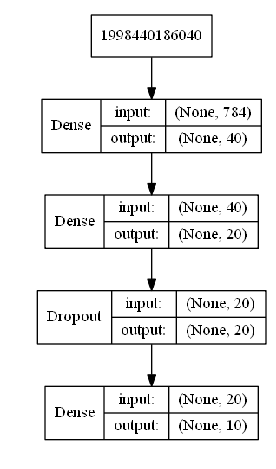

In [12]:
from keras.layers import Dropout

model5 = Sequential()
model5.add(Dense(units=40, activation="relu", input_shape=(x_train_.shape[1], ), bias_initializer="one"))
model5.add(Dense(units=20, activation="relu", input_shape=(x_train_.shape[1], ), bias_initializer="one"))
model5.add(Dropout(0.4))
model5.add(Dense(units=10, activation="softmax", input_shape=(x_train_.shape[1], ), bias_initializer="one"))

sgd = SGD(lr=0.1)
model5.compile(sgd, loss="categorical_crossentropy", metrics=["accuracy"])

plot_model(model5, to_file="model5.png", show_shapes=True, show_layer_names=False)
img = plt.imread("model5.png")
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(img)

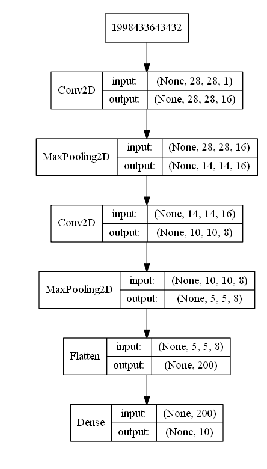

In [16]:
from keras.layers import Conv2D, MaxPool2D, Flatten

model6 = Sequential()
# 至少传入参数filters, kernel_size
# 即 多少个filter, 每次filter的单位是多少,默认步长是(1, 1), padding是vaild
# padding=same, 代表在卷积之后,使得输出与原输入一样
# valid 代表不填充
model6.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), padding="same", activation="relu"))
# 卷积层输出 16 * 28 * 28
# 一般卷积层后面紧接着一个池化层,由于向下采样
# 默认池化单位是(2, 2), 相当于削减1/4体积
model6.add(MaxPool2D())
model6.add(Conv2D(8, (5, 5)))
# 卷积层输出 8 * 10 * 10
model6.add(MaxPool2D())
# 卷积网络超级费计算, 用CPU实在是煎熬
model6.add(Flatten())
model6.add(Dense(units=10, activation="softmax"))

sgd6 = SGD(0.1)
adm6 = Adam(0.005)

model6.compile(adm6, loss="categorical_crossentropy", metrics=["accuracy"])
plot_model(model6, to_file="model6.png", show_shapes=True, show_layer_names=False)
img = plt.imread("model6.png")
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(img)